In [1]:
# The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: 
# one for training (or development) and the other one for testing (or for performance evaluation). 
# The split between the train and test set is based upon a messages posted before and after a specific date.

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
# train the model on all categories:
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
# print entry from training set:

print(train.data[13])

From: dbm0000@tm0006.lerc.nasa.gov (David B. Mckissock)
Subject: Re: Space Station Redesign, JSC Alternative #4
Organization: NASA Lewis Research Center / Cleveland, Ohio
Lines: 102
Distribution: world
NNTP-Posting-Host: tm0006.lerc.nasa.gov
News-Software: VAX/VMS VNEWS 1.41    

In article <1993Apr23.184732.1105@aio.jsc.nasa.gov>, kjenks@gothamcity.jsc.nasa.gov writes...

   {Description of "External Tank" option for SSF redesign deleted}

>Mark proposed this design at Joe Shea's committee in Crystal City,
>and he reports that he was warmly received.  However, the rumors
>I hear say that a design based on a wingless Space Shuttle Orbiter
>seems more likely.

Yo Ken, let's keep on-top of things! Both the "External Tank" and
"Wingless Orbiter" options have been deleted from the SSF redesign
options list. Today's (4/23) edition of the New York Times reports
that O'Connor told the panel that some redesign proposals have
been dropped, such as using the "giant external fuel tanks used
in la

In [4]:
# train and predict:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
preds = model.predict(test.data)

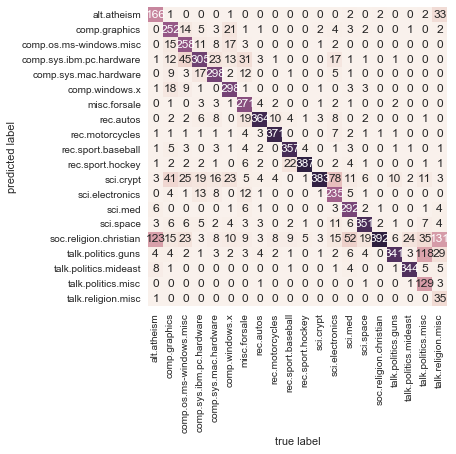

In [5]:
# display confusion matrix:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [6]:
# get category (1):

s = 'A new study has suggested that atheism is doomed because religious people have higher rates of reproduction.'
pred = model.predict([s])
train.target_names[pred[0]]

'soc.religion.christian'

In [7]:
# get category (2):

s = 'Do we really need to explore Mars?'
pred = model.predict([s])
train.target_names[pred[0]]

'sci.space'

In [8]:
# get category (3):

s = 'President Abbas and I discussed how to make progress toward peace, building capacity of ' \
    'Palestinian security forces and stopping incitement'
pred = model.predict([s])
train.target_names[pred[0]]

'talk.politics.mideast'